## Librarias necesarias

In [1]:
import random
import string
import numpy as np
from math import e
from statistics import mode, mean
from py_linq import Enumerable
import time
import pylab as pl

## Declaración de variables globales

In [2]:

numCiudades=12
numPoblacion=50
generaciones=20000
Q=[0.5, 0.75, 0.95] #Probabilidad de no mutación


#Nombre de todas las ciudades que debe visitar el viajero
ciudades=["Campeche", "Cancun", "chetumal", "chichenitza", 'izamal','playa del carmen','puerto morales','merida','tizimni','TUlum','uxmal',"Valladolid"]

#Genes posibles
asci=string.ascii_uppercase


#Distancias
dis=[
    ['A', [0, 515, 425, 315, 265, 583, 551, 196, 409, 470, 171, 355]],#Campeche
    ['B',[512, 0, 382, 205, 266, 68, 36, 320, 212, 131, 399, 160]], # cancunn
    ['C',[425, 382, 0, 410, 471, 314, 346, 525, 417, 251, 605, 365]],# chetumal, 
    ['D',[315, 205, 410, 0, 62, 273, 241, 115, 97, 159, 199, 41]],#chichenitza
    ['E',[265, 266, 471, 62, 0, 334, 302, 72, 159, 220, 149, 106]],#izamal
    ['F',[583, 68, 314, 273, 334, 0, 32, 388, 279, 63, 468, 228]],#playa del carmen
    ['G',[551, 36, 346, 241, 302, 32, 0, 256, 297, 95, 435, 195]],# puerto morales
    ['H',[196, 320, 525, 115, 72, 388, 256, 0, 212, 274, 80, 160]],#merida
    ['I',[409, 212, 417, 97, 159, 279, 297, 212, 0, 166, 291, 52]],#tizimni
    ['J',[470, 131, 251, 159, 220, 63, 95, 274, 166, 0, 366, 291]],#TUlum
    ['K',[171, 399, 605, 199, 149, 468, 435, 80, 291, 366, 0, 239]],#uxmal
    ['L',[355, 160, 365, 41, 106, 228, 195, 160, 52, 291, 239, 0]]#Valladolid
     ]

## Definición de funciones

In [3]:

def CalculoFitness(individuo):
    #Sabemos cual es la distancia correcta al obtener los indices de la matriz dis usando el orden de las letras del codigo ascii
    suma=0
    #Calculamos la distancia entre ciudades
    for i in range(len(individuo)-1):
        actual=string.ascii_uppercase.index(individuo[i])
        sig=string.ascii_uppercase.index(individuo[i+1])
        suma+=dis[actual][1][sig]
    #calculamos la distancia a la ciudad de origen
    actual=string.ascii_uppercase.index(individuo[numCiudades-1])
    sig=string.ascii_uppercase.index(individuo[0])
        
    return suma+dis[actual][1][sig]
    
def CalculoProbSelec (num, fitness):
    x= 1 - ((fitness[num] - min(fitness))/max(fitness) )
    return x

def Mutacion(padre,r):
    for j in range(len(padre)):
        
        if random.random()>r:#Si es mayor mutamos
            if j+1==len(padre):#si es la ultima ciudad lo cambiamos con el primero
                aux=padre[0]
                padre[0]=padre[j]
                padre[j]=aux
            else:#Cambiamos un gen por el siguiente
                aux=padre[j+1]
                padre[j+1]=padre[j]
                padre[j]=aux                        
       
    return padre

def lectura (mejor):# funcion para decodificar las rutas
    ruta=[]
    for i in range (numCiudades):
        a=string.ascii_uppercase.index(mejor[i])
        ruta.append(ciudades[a])

    return ruta


## Algoritmo genético

In [4]:



#variables para guardar registros
historico=[]

for r in Q:
    registro=[]#aqui guardaremos los datos para la variable que estemos probando
    poblacion=[]#poblacion con la que trabajaremos
    fitnes=[]#array con el fitness de los individuos
    Mejor_historico=[]#Mejor de la ejecucion
    letras=[]#
    epocas=0
    resumen=generaciones/50
    muestra=generaciones/10
    
    #genes posibles
    for i in range(numCiudades):
        letras.append(asci[i])

    #CABECERA
    print("NTOWN: ", numCiudades, "Poblacion total: ", numPoblacion, "NGEN: ", generaciones, "Q: ", r)

    #Generamos la poblacion inicial aleatoria
    for i in range(numPoblacion):
        ruta=[]
        opciones=[]
        for i in range(numCiudades):#dependiendo del número de ciudades habrá más o menos letras disponibles
            opciones.append(asci[i])
        for j in range(numCiudades):
            elegida=random.choice(opciones)#Ciudad elegida
            ruta.append(elegida)
            n=opciones.index(elegida)
            #la quitamos de la lista para no volver a la misma ciudad en la misma ruta
            if j!=numCiudades:
                opciones.pop(n)
        poblacion.append(ruta)


    pob=Enumerable(poblacion)#TRANSFORMAMOS POBLACION EN ENUMERABLE PARA PODER USAR LINQ
    fitnes=pob.select(lambda x: CalculoFitness(x))#calculamos el fitnes de los individuos
    fitnes=np.array(fitnes)
    while True:

        #Seleccion del padre
        aleatorio=random.randint(0,numPoblacion-1)
        Padre=empieza=aleatorio
        Flag=False #False = aleatorio --> final, True = 0 --> aleatorio
        numero=0

        while Flag==False or Padre<=(empieza-1): #Calculamos la probabilidad de todos los individuos de ser padres y vemos si se replica y si muta


            numero=random.random()

            prb=CalculoProbSelec(Padre, fitnes)

            #si es menor, se replica
            if numero<prb:
                #Sustituimos uno aleatorio
                aleatorio=random.randint(0,numPoblacion-1)
                #Mutamos al cromosoma del padre
                poblacion[aleatorio]=Mutacion(poblacion[Padre],r)
                #calculamos su fitnes
                fitnes[aleatorio]=CalculoFitness(poblacion[aleatorio])

            if Padre==numPoblacion-1:#Seguimos ejecutando sobre la poblacion de forma secuendial
                Padre=0
                Flag=True
            Padre+=1


        #comprobamos si alguno de los que hemos obtenido es mejor solución
        pob=Enumerable(poblacion)#TRANSFORMAMOS POBLACION EN ENUMERABLE PARA PODER USAR LINQ
        menorFitnes=pob.min(lambda x: CalculoFitness(x))
        mejor=pob.where(lambda x: CalculoFitness(x)==menorFitnes).take(1)#obtenemos el mejor individuo de la generacion

        if epocas==0:
            Mejor_historico=mejor[0]
            
        #guardamos el mejor fitnes encontrado
        if CalculoFitness(mejor[0]) < CalculoFitness(Mejor_historico):
            print("F. Histo:", CalculoFitness(Mejor_historico), "F. mejor: ",CalculoFitness(mejor[0]))
            Mejor_historico=mejor[0][:]

        
        
        #Mostramos el resumen de la ejecucion
        if epocas%resumen == 0 or epocas%muestra==0:

            aparece=pob.count(lambda x: CalculoFitness(x)==menorFitnes)#comparamos entre todos los individuos para saber cuales son igual que el mejor

            mayorFitnes=pob.max(lambda x: CalculoFitness(x))
            mediaFitness=pob.avg(lambda x: CalculoFitness(x))
    
            #individuo de consenso
            consenso=[]
            #Comparamos gen a gen cual es el que más se repite
            for i in range(numCiudades):
                posicion=[]
                for j in range(numPoblacion):
                    posicion.append(poblacion[j][i])
                consenso.append((mode(posicion)))

            #Mostramos el resumen
            print("\n\nGeneracion nº: ", epocas)
            print("Distancias: \nMedia: ", mediaFitness, "Minima: ", menorFitnes, "Mayor: ", mayorFitnes)       
            print("Mejor individuo de la población: ", lectura(mejor[0]), " %BEST (",(aparece/numPoblacion)*100, "%)")
            print('Individuo de consenso: ', consenso)
            print("\nMejor individuo hasta el momento: ", Mejor_historico)
            print("Con distancia:", CalculoFitness(Mejor_historico))

            #Guardamos los datos para las gráficas
            registro.append([epocas,[menorFitnes,mayorFitnes,mediaFitness], consenso])

            if epocas%muestra==0:
                print("Muestreo de la poblacion: ")
                print(pob.take(round(numPoblacion*0.2)))





        #fin de la ejecucion
        if epocas == generaciones:
            print("La mejor ruta que ha encontrado el algoritmo es: ", lectura(Mejor_historico))
            print("Con una distancia de total de: ", CalculoFitness(Mejor_historico))
            break
        epocas+=1
    
    #guardamos los datos de la ejecucion
    historico.append(registro[:])





duo de consenso:  ['A', 'D', 'K', 'H', 'G', 'J', 'L', 'E', 'F', 'C', 'I', 'B']

Mejor individuo hasta el momento:  ['L', 'D', 'E', 'H', 'A', 'K', 'I', 'J', 'F', 'G', 'B', 'C']
Con distancia: 1877


Generacion nº:  8000
Distancias: 
Media:  3377.0 Minima:  3377 Mayor:  3377
Mejor individuo de la población:  ['Valladolid', 'merida', 'chichenitza', 'TUlum', 'playa del carmen', 'tizimni', 'puerto morales', 'uxmal', 'izamal', 'chetumal', 'Cancun', 'Campeche']  %BEST ( 100.0 %)
Individuo de consenso:  ['L', 'H', 'D', 'J', 'F', 'I', 'G', 'K', 'E', 'C', 'B', 'A']

Mejor individuo hasta el momento:  ['L', 'D', 'E', 'H', 'A', 'K', 'I', 'J', 'F', 'G', 'B', 'C']
Con distancia: 1877
Muestreo de la poblacion: 
[['L', 'H', 'D', 'J', 'F', 'I', 'G', 'K', 'E', 'C', 'B', 'A'], ['L', 'H', 'D', 'J', 'F', 'I', 'G', 'K', 'E', 'C', 'B', 'A'], ['L', 'H', 'D', 'J', 'F', 'I', 'G', 'K', 'E', 'C', 'B', 'A'], ['L', 'H', 'D', 'J', 'F', 'I', 'G', 'K', 'E', 'C', 'B', 'A'], ['L', 'H', 'D', 'J', 'F', 'I', 'G', 'K', 'E',

## Gráficas con los resultados

In [21]:
h=np.array(historico)
x=[]
y=[]
y1=[]
y2=[]
y3=[]
individuo=[]
#Descomprimimos en arrays los valores registrados
for i in range(len(h[0])):
    y1.append(h[2][i][1][0])
    y2.append(h[2][i][1][1])
    y3.append(h[2][i][1][2])
    x.append(h[2][i][0])
    individuo.append(h[2][i][2])
y.append(y1)
y.append(y2)
y.append(y3)


<ipython-input-21-e36f1dc96e01>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  h=np.array(historico)


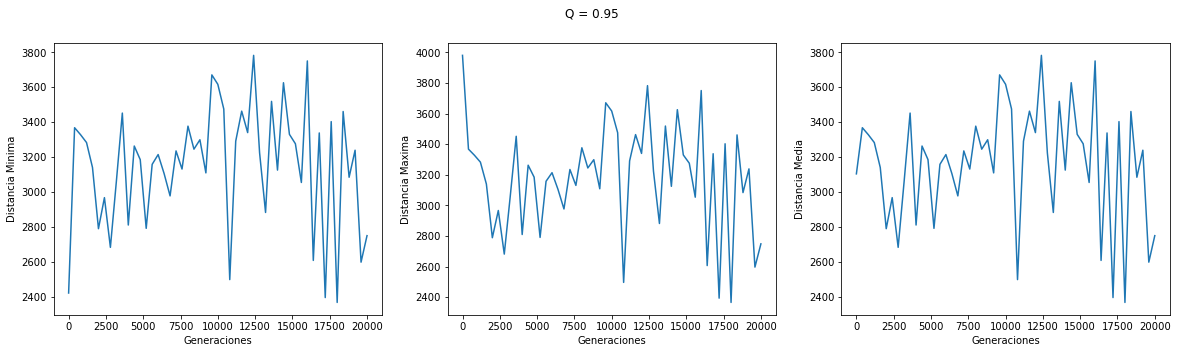

In [22]:
import pylab as pl
fig,ax=pl.subplots(1,3, figsize=(20,5))
index=0
labels=['Distancia Minima','Distancia Maxima', 'Distancia Media']
fig.suptitle("Q = 0.95 ")
#for row in ax:
for col in ax:
    col.plot(x,y[index])
    col.set_xlabel('Generaciones')
    col.set_ylabel(labels[index])
    index+=1
pl.show()
#pl.plot(x,y[0][0])

#### Individuo de consenso

In [23]:
#Vemos el número de veces que se repite cada individuo de consenso
for i in range(len(individuo)):
    individuo[i]= ''.join(individuo[i])

conteo = {i:individuo.count(i) for i in individuo}
print(conteo)

{'JIFBKFDEAEJF': 1, 'EAKGILJFDBHC': 1, 'JHDLICFAGKEB': 1, 'BHKFIDGLECAJ': 1, 'LCKADJEGFIHB': 1, 'EHABFCIGLDJK': 1, 'LAHJFGDKCIEB': 1, 'BFLACJIDGEKH': 1, 'IHJKACLDFBEG': 1, 'DJEBFAIGKHLC': 1, 'BDJKHAICGFEL': 1, 'BKDJFAHIGELC': 1, 'KHGELJACDIBF': 1, 'GFIELDAJKHCB': 1, 'CABLFDHGJKEI': 1, 'HKJBAGECFILD': 1, 'CJAILGDBFHEK': 1, 'DGKAHJIFBLEC': 1, 'EBLJFDHKGACI': 1, 'ADKHGJLEFCIB': 1, 'LHDJFIGKECBA': 1, 'ICFBALDEJHGK': 1, 'KLIHAFCDJBEG': 1, 'DALIEGJCHBFK': 1, 'BILJHKFDAGEC': 1, 'BIEKGAFDJCLH': 1, 'EGDBCIHFLKAJ': 1, 'GFAKHELBIJDC': 1, 'KCADFLBEJIGH': 1, 'KGEFCAJHLDBI': 1, 'AHCGIKJBLEFD': 1, 'JKLCEFDBHAGI': 1, 'ICLHBFDAGJEK': 1, 'LDIACGEKJBFH': 1, 'GDFELHABKJIC': 1, 'BHLIADGJFEKC': 1, 'KJAFCLDBEHIG': 1, 'BKFGJLIHCEAD': 1, 'BJCGLHDEIKFA': 1, 'IJLEAHGKDFBC': 1, 'JLEGIDHFACBK': 1, 'HILGJCABFKED': 1, 'BICLJFADGEKH': 1, 'HLIDEKBFCJGA': 1, 'DAGCBLHJIEKF': 1, 'JDELIFBGCHAK': 1, 'FCGADIKBLHJE': 1, 'ECBFGKLJADIH': 1, 'JKDEIGAHFLBC': 1, 'ALDCKIJGFBEH': 1, 'IKHEDGBJCLFA': 1}
